c:\Users\Tushar\anaconda3\envs\cs561\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


New graph created with 40 nodes and 64 edges.


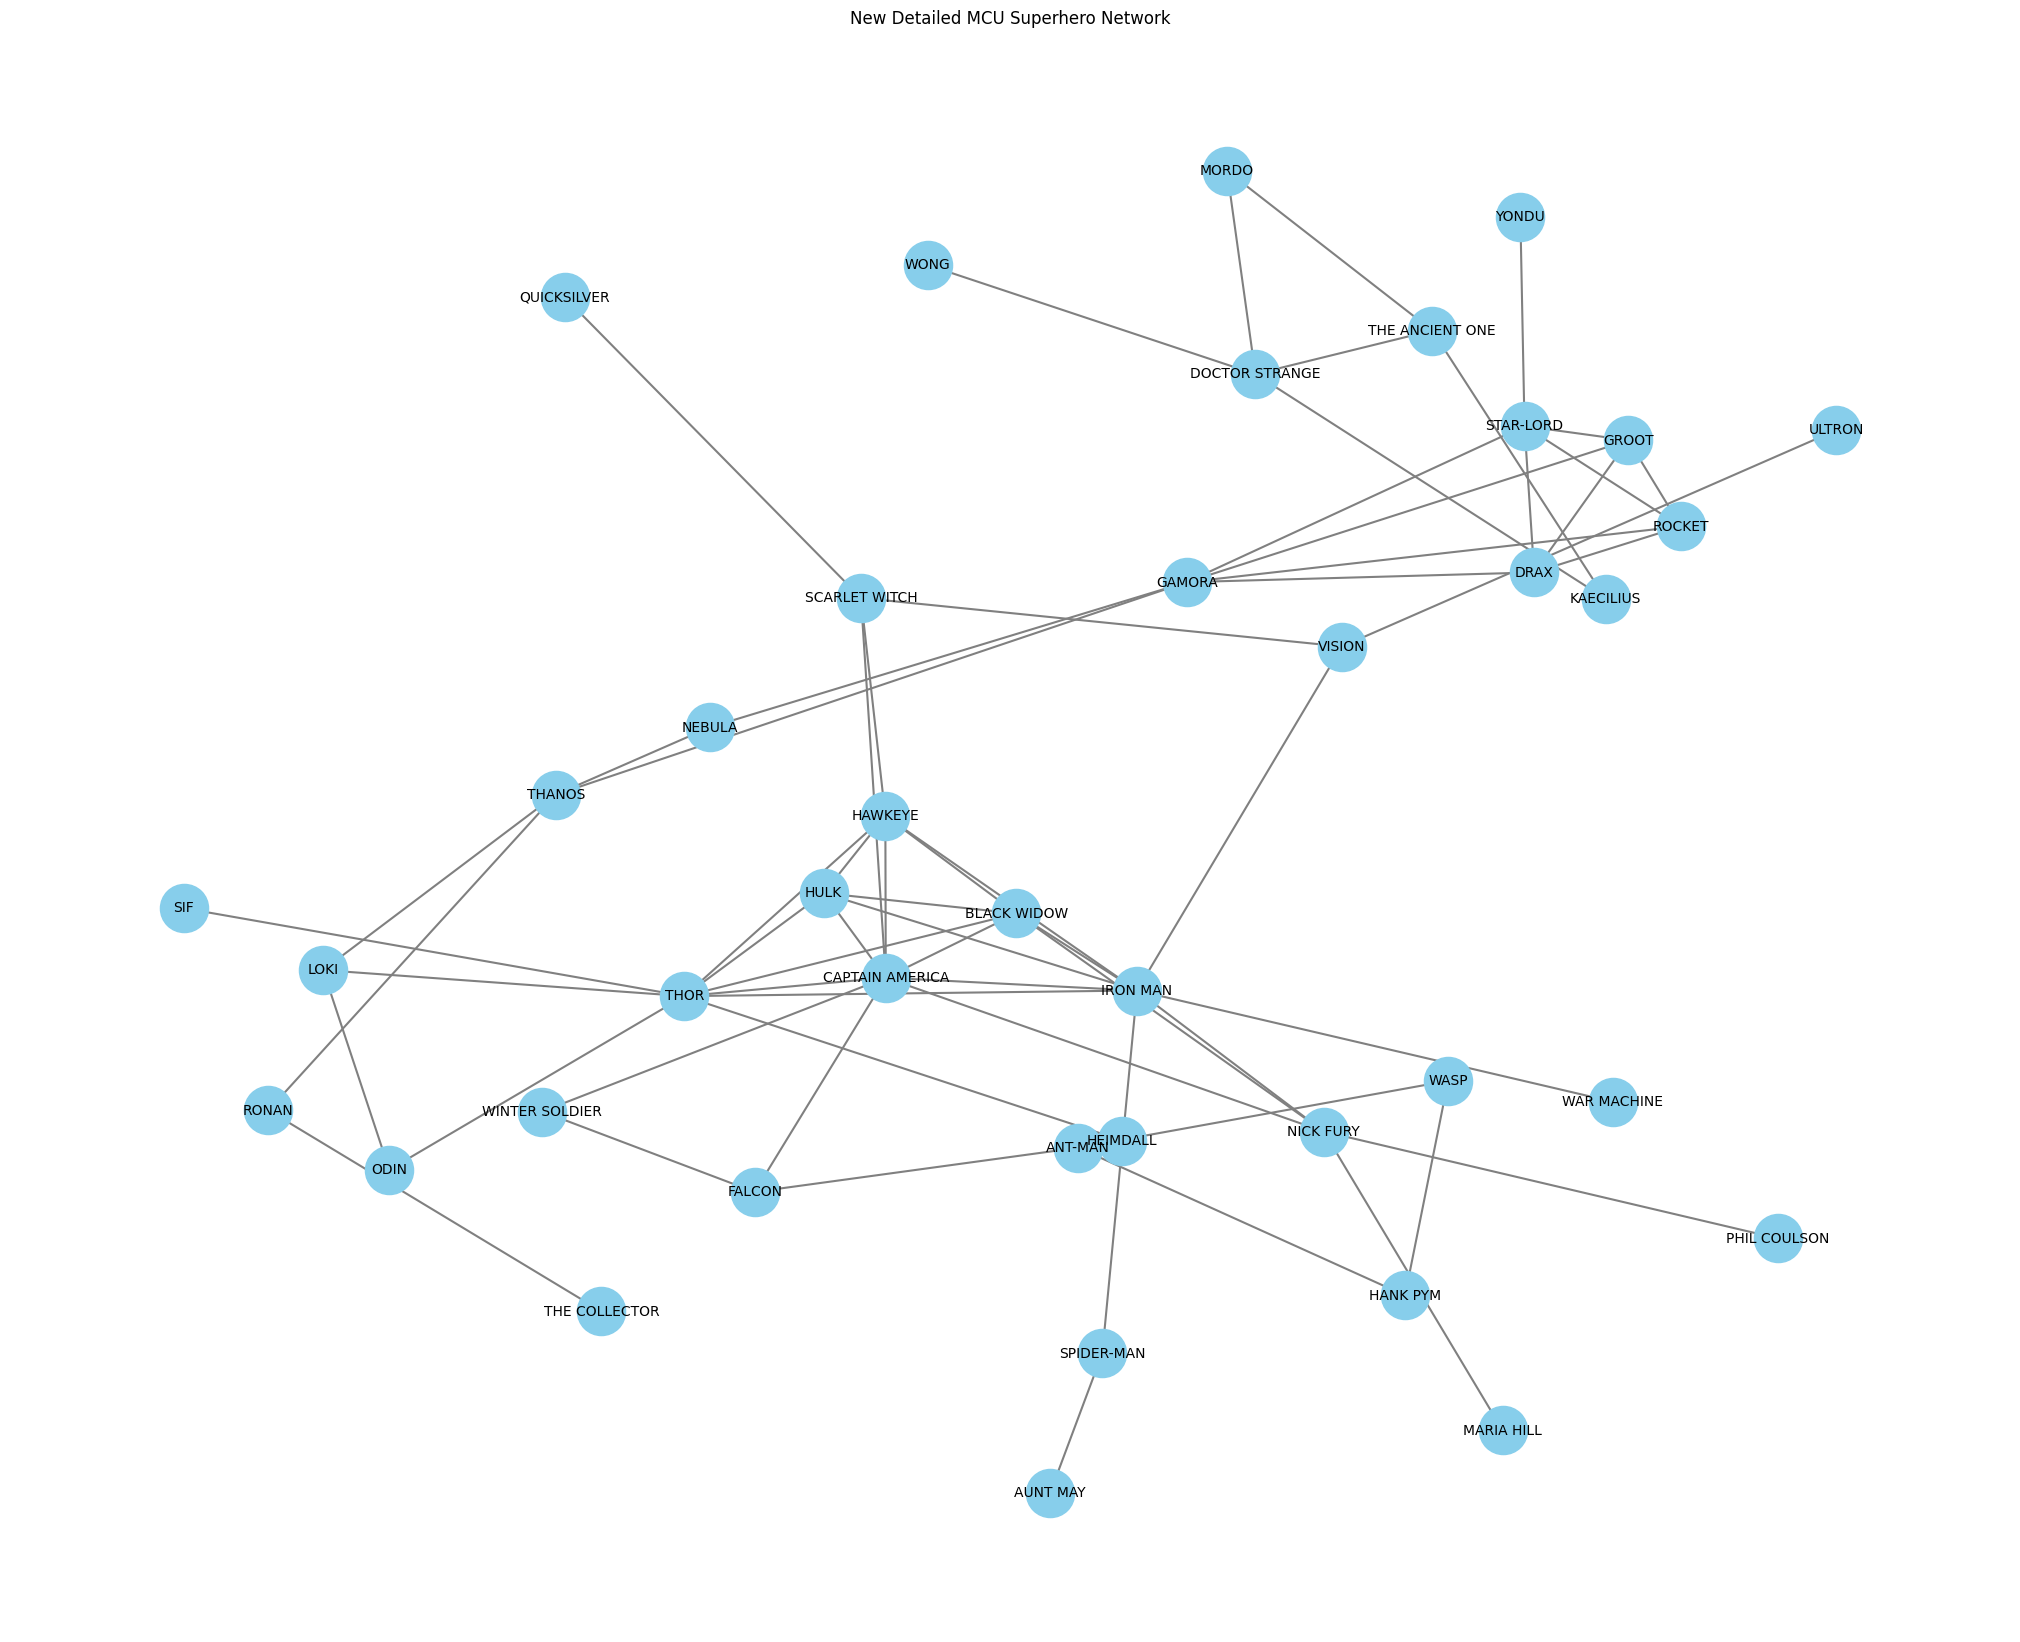

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from node2vec import Node2Vec
from sklearn.metrics.pairwise import cosine_similarity
edges = [
    ('CAPTAIN AMERICA', 'IRON MAN'), ('CAPTAIN AMERICA', 'THOR'), ('CAPTAIN AMERICA', 'HULK'),
    ('CAPTAIN AMERICA', 'BLACK WIDOW'), ('CAPTAIN AMERICA', 'HAWKEYE'), ('CAPTAIN AMERICA', 'NICK FURY'),
    ('CAPTAIN AMERICA', 'FALCON'), ('CAPTAIN AMERICA', 'WINTER SOLDIER'), ('CAPTAIN AMERICA', 'SCARLET WITCH'),
    ('IRON MAN', 'THOR'), ('IRON MAN', 'HULK'), ('IRON MAN', 'BLACK WIDOW'), ('IRON MAN', 'HAWKEYE'),
    ('IRON MAN', 'NICK FURY'), ('IRON MAN', 'WAR MACHINE'), ('IRON MAN', 'SPIDER-MAN'), ('IRON MAN', 'VISION'),
    ('THOR', 'HULK'), ('THOR', 'BLACK WIDOW'), ('THOR', 'HAWKEYE'), ('THOR', 'LOKI'),
    ('HULK', 'BLACK WIDOW'), ('HULK', 'HAWKEYE'), ('HULK', 'THOR'),
    ('BLACK WIDOW', 'HAWKEYE'), ('BLACK WIDOW', 'NICK FURY'),
    ('NICK FURY', 'MARIA HILL'), ('NICK FURY', 'PHIL COULSON'),
    ('SCARLET WITCH', 'QUICKSILVER'), ('SCARLET WITCH', 'VISION'), ('SCARLET WITCH', 'HAWKEYE'),
    ('VISION', 'ULTRON'),

    # Asgardian Cluster (Yellow)
    ('THOR', 'ODIN'), ('THOR', 'HEIMDALL'), ('THOR', 'SIF'),
    ('LOKI', 'ODIN'), ('LOKI', 'THANOS'),

    # Guardians/Cosmic Cluster (Green)
    ('STAR-LORD', 'GAMORA'), ('STAR-LORD', 'DRAX'), ('STAR-LORD', 'ROCKET'), ('STAR-LORD', 'GROOT'),
    ('STAR-LORD', 'YONDU'),
    ('GAMORA', 'DRAX'), ('GAMORA', 'ROCKET'), ('GAMORA', 'GROOT'), ('GAMORA', 'NEBULA'), ('GAMORA', 'THANOS'),
    ('DRAX', 'ROCKET'), ('DRAX', 'GROOT'),
    ('ROCKET', 'GROOT'),
    ('NEBULA', 'THANOS'), ('RONAN', 'THANOS'), ('RONAN', 'THE COLLECTOR'),

    # Magic Cluster (Magenta)
    ('DOCTOR STRANGE', 'WONG'), ('DOCTOR STRANGE', 'THE ANCIENT ONE'), ('DOCTOR STRANGE', 'MORDO'),
    ('DOCTOR STRANGE', 'KAECILIUS'),
    ('MORDO', 'THE ANCIENT ONE'), ('KAECILIUS', 'THE ANCIENT ONE'),

    # Ant-Man Cluster (White)
    ('ANT-MAN', 'FALCON'), ('ANT-MAN', 'WASP'), ('ANT-MAN', 'HANK PYM'),
    ('WASP', 'HANK PYM'),

    # Spider-Man Cluster (Red, partial) - Integrating with Avengers
    ('SPIDER-MAN', 'AUNT MAY'),

    # Other connections
    ('WINTER SOLDIER', 'FALCON'),
]

G_detailed = nx.Graph()
G_detailed.add_edges_from(edges)
print(f"New graph created with {G_detailed.number_of_nodes()} nodes and {G_detailed.number_of_edges()} edges.")
plt.figure(figsize=(20, 16))
pos = nx.spring_layout(G_detailed, seed=42, k=0.6)
nx.draw(G_detailed, pos, with_labels=True, node_color='skyblue', node_size=1200, edge_color='gray', font_size=10, width=1.5)
plt.title("New Detailed MCU Superhero Network")
plt.show()

In [3]:
node2vec_detailed = Node2Vec(G_detailed,
                             dimensions=64,
                             walk_length=30,
                             num_walks=200,
                             p=1,
                             q=1,
                             workers=4)

model = node2vec_detailed.fit(window=10, min_count=1, batch_words=4)

print("\nNode2Vec model training on the detailed graph is complete.")

Computing transition probabilities:   0%|          | 0/40 [00:00<?, ?it/s]


Node2Vec model training on the detailed graph is complete.


In [4]:
query_node = 'CAPTAIN AMERICA'
all_nodes = list(model.wv.index_to_key)
all_vectors = model.wv.vectors
query_vector = model.wv[query_node].reshape(1, -1) 
similarity_scores = cosine_similarity(query_vector, all_vectors)[0]
results = []
for node, score in zip(all_nodes, similarity_scores):
    if node != query_node:
        results.append((node, score))
results.sort(key=lambda x: x[1], reverse=True)
print(f"\n Top 10 Most Similar Superheroes to {query_node} (Manual Calculation) ")
for node, similarity in results[:10]:
    print(f"Character: {node:<20} | Similarity: {similarity:.4f}")


 Top 10 Most Similar Superheroes to CAPTAIN AMERICA (Manual Calculation) 
Character: BLACK WIDOW          | Similarity: 0.8740
Character: HULK                 | Similarity: 0.8613
Character: HAWKEYE              | Similarity: 0.8591
Character: WINTER SOLDIER       | Similarity: 0.8318
Character: FALCON               | Similarity: 0.8317
Character: IRON MAN             | Similarity: 0.8278
Character: WAR MACHINE          | Similarity: 0.7799
Character: NICK FURY            | Similarity: 0.7789
Character: THOR                 | Similarity: 0.7784
Character: SCARLET WITCH        | Similarity: 0.7527


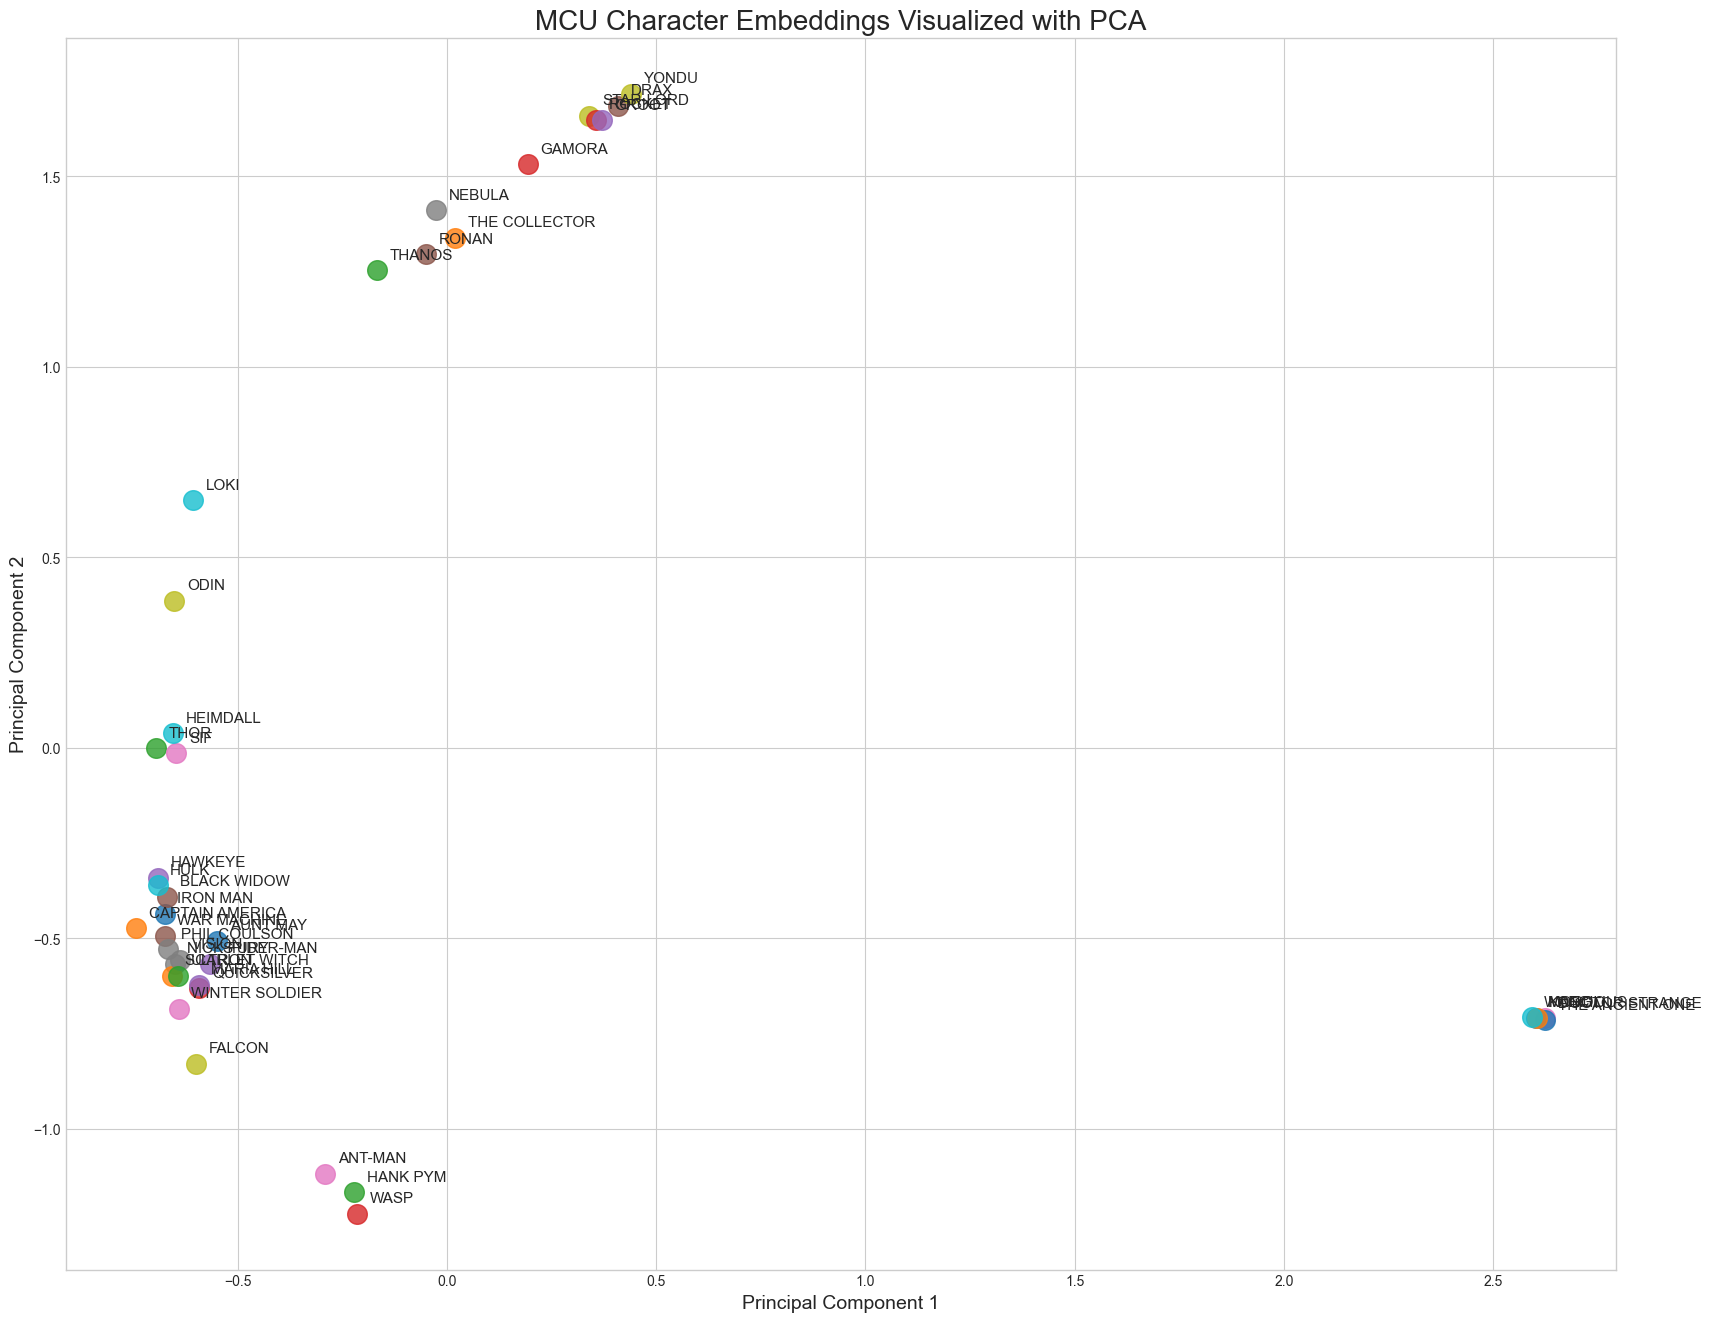

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


node_names = model.wv.index_to_key
embeddings = np.array([model.wv[node] for node in node_names])

pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(20, 16))

for i, name in enumerate(node_names):
    x, y = embeddings_2d[i, 0], embeddings_2d[i, 1]
    plt.scatter(x, y, s=200, alpha=0.8)
    plt.text(x + 0.03, y + 0.03, name, fontsize=11)

plt.title("MCU Character Embeddings Visualized with PCA", fontsize=20)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.grid(True)
plt.show()